In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [4]:
df = pd.read_csv(r'C:\Users\Codex_Jay\Downloads\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print('== INSPECT DATAFRAME ==')
print(df.shape)
rows, columns = df.shape
print(f'Medical insurance dataset contains {rows} rows and {columns} columns')
print('---' * 50)
print(df.info())
print('---' * 50)

== INSPECT DATAFRAME ==
(1338, 7)
Medical insurance dataset contains 1338 rows and 7 columns
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------------------------------------------------------------------------------------------------------------------------------


In [6]:
#Summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Exploratory Data Analysis


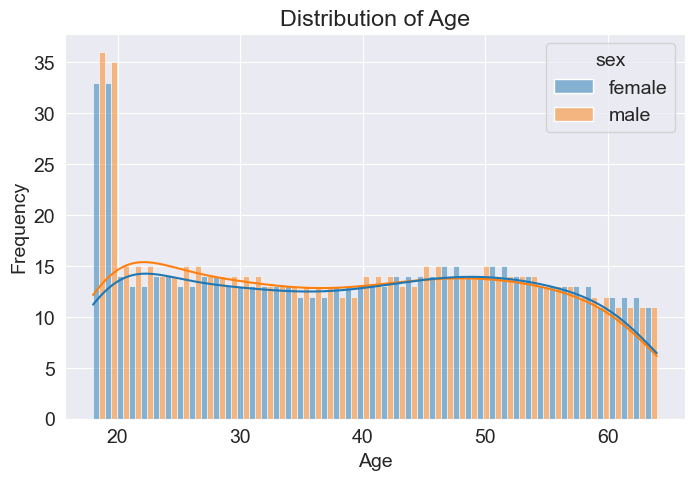

In [7]:
sns.histplot(
    data = df, 
    x = 'age',
    hue = 'sex',
    kde=True,
    bins = 47,
    multiple='dodge'
)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency');

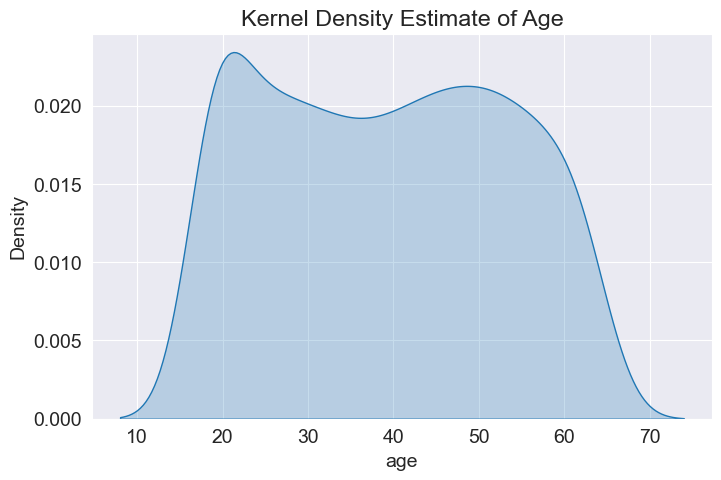

In [8]:
sns.kdeplot(
    data = df,
    x = 'age',
    fill = True
)
plt.title('Kernel Density Estimate of Age');

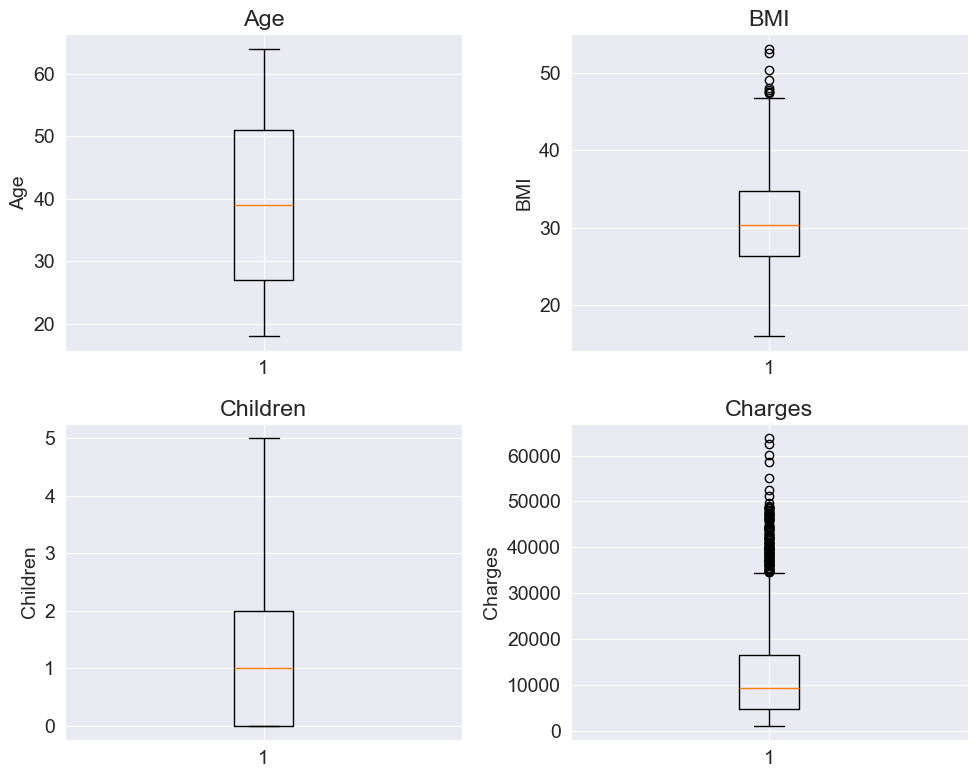

In [9]:
fig , ax = plt.subplots(2, 2, figsize = (10, 8))
ax[0,0].boxplot(df['age'])
ax[0,0].set_title('Age')
ax[0,0].set_ylabel('Age')

ax[0,1].boxplot(df['bmi'])
ax[0,1].set_title('BMI')
ax[0,1].set_ylabel('BMI')

ax[1,0].boxplot(df['children'])
ax[1,0].set_title('Children')
ax[1,0].set_ylabel('Children')

ax[1,1].boxplot(df['charges'])
ax[1,1].set_title('Charges')
ax[1,1].set_ylabel('Charges')

plt.tight_layout()
plt.show()


In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

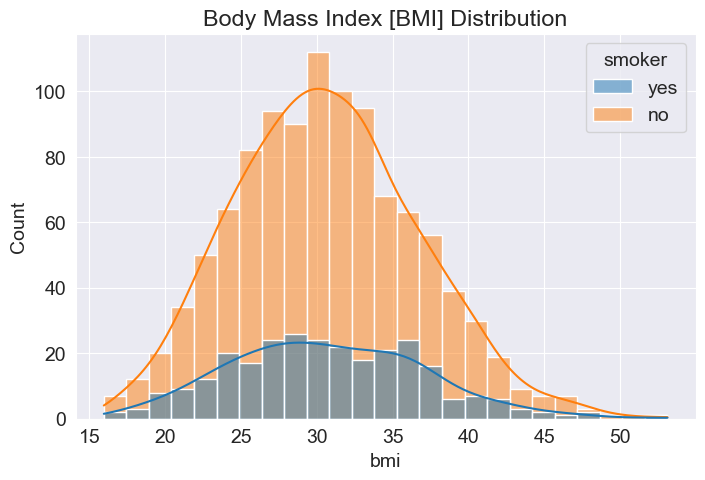

In [11]:
sns.histplot(
    data = df,
    x = 'bmi',
    hue = 'smoker',
    kde = True
)
plt.title('Body Mass Index [BMI] Distribution');

### Inference from BMI
The distribution follows a gaussian distribution curve with the 
concentration of bmi clustered around 25 - 35, this shows that most individuals fall in the overweight - obesity class II

# BMI Categories

| BMI (KG/M2)           | Categories            |
|-----------------------|------------------------|
| < 18.5                |   Underweight          |
| 18.5 - 24.9           |   Normal Weight        |
| 25 - 29.9             |   Overweight             |
| 30 - 34.9             |   Obesity Class I    |
| 35 - 39.9             |   Obesity Class II    |
| >= 40                 |   Obesity Class III   |

In [12]:
smoke_count = df['smoker'].value_counts()
print('== DISTRIBUTION OF SMOKE COUNT ==')
print(f'There are {smoke_count.iloc[1]} smokers and {smoke_count.iloc[0]} non-smokers')

== DISTRIBUTION OF SMOKE COUNT ==
There are 274 smokers and 1064 non-smokers


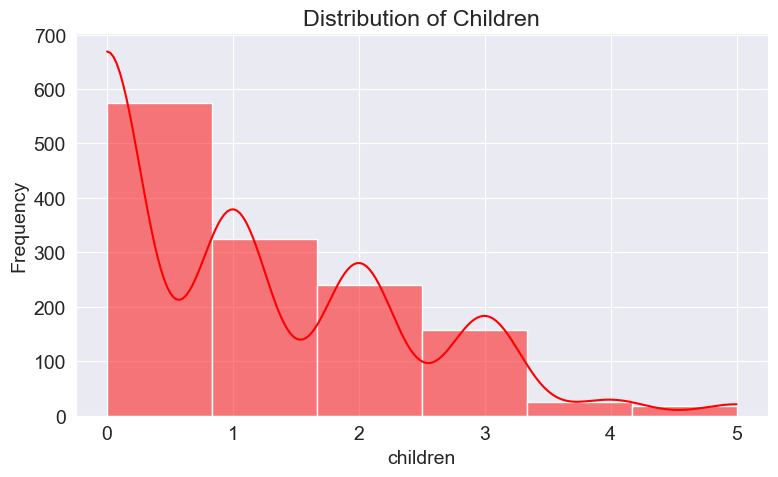

In [13]:
sns.histplot(
    data = df,
    x = 'children',
    kde = True,
    bins= 6,
    color = 'red'
)
plt.ylabel('Frequency')
plt.title('Distribution of Children')
plt.tight_layout()

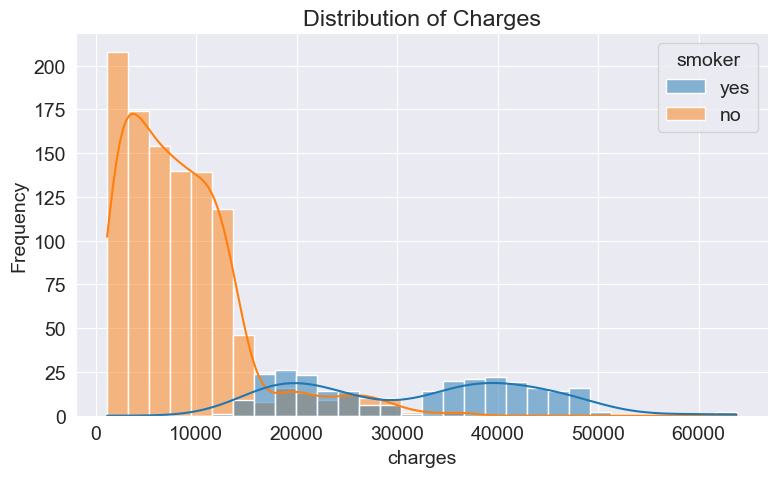

In [14]:
sns.histplot(
    data = df,
    x = 'charges',
    kde = True,
    bins = 30,
    hue = 'smoker',
    color = 'green'
)
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.tight_layout();

In [15]:
df.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


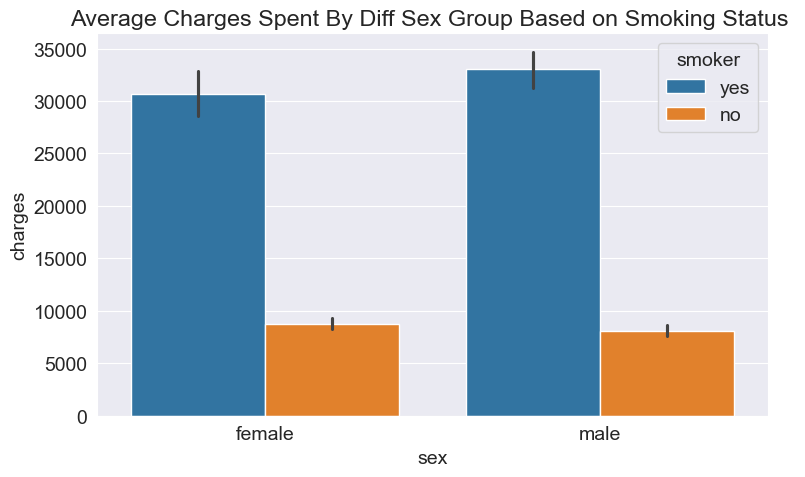

In [16]:
sns.barplot(data = df, x ='sex', y = 'charges', hue = 'smoker')
plt.title('Average Charges Spent By Diff Sex Group Based on Smoking Status ')
plt.tight_layout()

In [17]:
sorted(df['region'].unique())

['northeast', 'northwest', 'southeast', 'southwest']

In [18]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs
)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each 

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\Codex_Jay\AppData\Local\Temp\ipykernel_23792\115396346.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data = df[df['smoker'] == 'yes'],


<Axes: xlabel='age', ylabel='charges'>

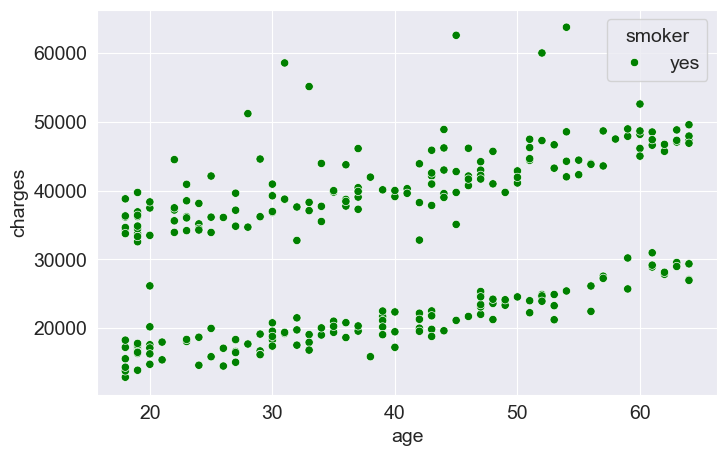

In [20]:
sns.scatterplot(data = df[df['smoker'] == 'yes'], 
                x = 'age', 
                y = 'charges',
                hue = 'smoker',
                palette=['green', 'red']
)

<Axes: xlabel='smoker', ylabel='charges'>

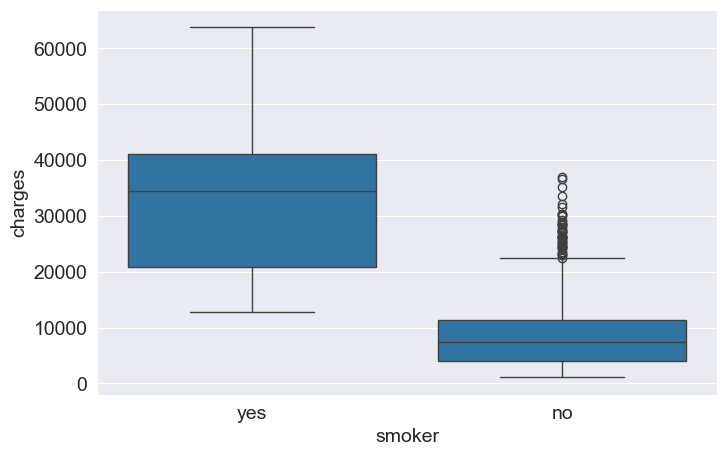

In [21]:
sns.boxplot(data = df, x = 'smoker', y = 'charges')

In [22]:
df.groupby('smoker')['charges'].sum()

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

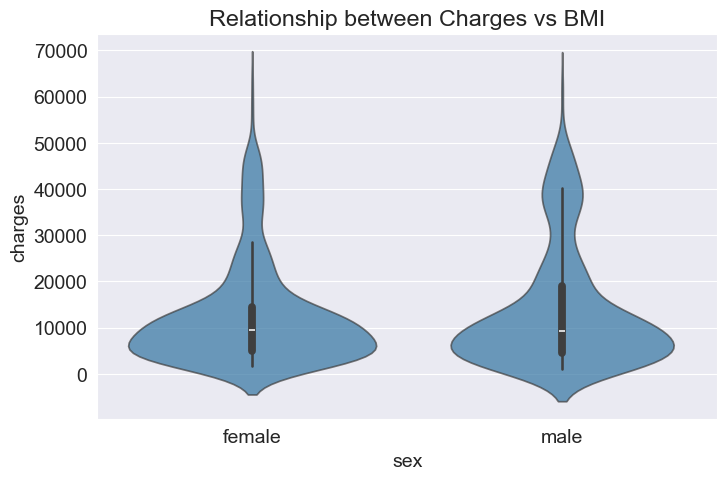

In [23]:
sns.violinplot(data = df,
                x = 'sex',
                y = 'charges',
                alpha = 0.7,
)
plt.title('Relationship between Charges vs BMI')
plt.show()

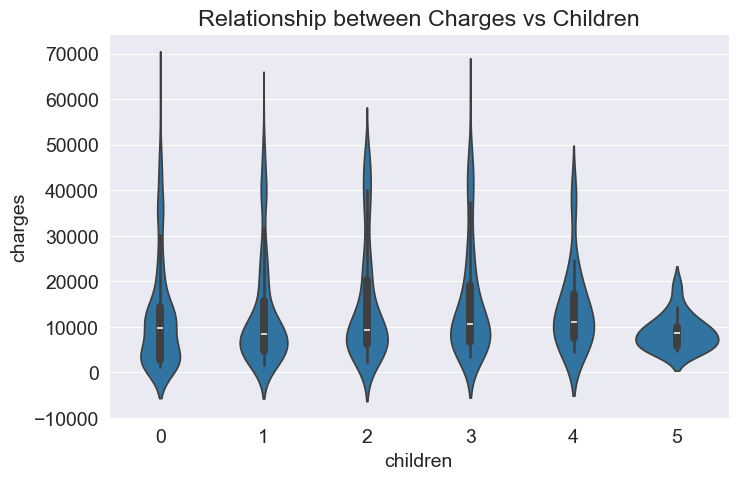

In [24]:
sns.violinplot(data = df,
                x = 'children',
                y = 'charges')
plt.title('Relationship between Charges vs Children');

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
smoker_code = {'no': 0, 'yes': 1}
smoker_values = df['smoker'].map(smoker_code)
df['smoker_code'] = smoker_values
df


,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [27]:
sex_code = {'female': 0, 'male': 1}
sex_values = df['sex'].map(sex_code)
df['sex_code'] = sex_values
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [28]:
correlation_smoker = df['smoker_code'].corr(df['charges'])
correlation_bmi = df['bmi'].corr(df['charges'])
correlation_children = df['children'].corr(df['charges'])
correlation_ages = df['age'].corr(df['charges'])
correlation_sex = df['sex_code'].corr(df['charges'])

In [29]:
print(f'Correlation between smoker vs charges : {correlation_smoker}')
print(f'Correlation between bmi vs charges : {correlation_bmi}')
print(f'Correlation between children vs charges : {correlation_children}')
print(f'Correlation between age vs charges : {correlation_ages}')
print(f'Correlation between sex vs charges : {correlation_sex}')

Correlation between smoker vs charges : 0.7872514304984778
Correlation between bmi vs charges : 0.1983409688336289
Correlation between children vs charges : 0.06799822684790487
Correlation between age vs charges : 0.29900819333064776
Correlation between sex vs charges : 0.05729206220202534


<Axes: >

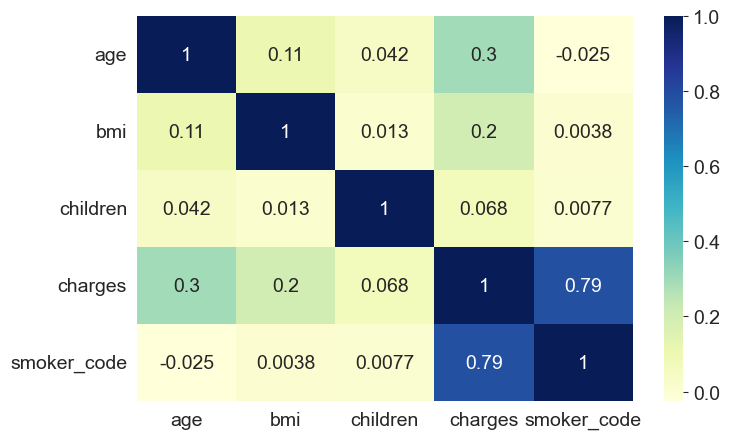

In [30]:
corr_matrix = df.select_dtypes('number').drop(columns = ['sex_code'])
corr_matrix = corr_matrix.corr()
sns.heatmap(corr_matrix, cmap = 'YlGnBu', annot = True)

### Linear Regression

In [31]:
def estimate_charge(age, w, b):
    return w * age + b

In [32]:
age = df['age']
age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [33]:
w = 50
b = 100
estimated_charges = estimate_charge(age, 400, 1500)
estimated_charges

0        9100
1        8700
2       12700
3       14700
4       14300
        ...  
1333    21500
1334     8700
1335     8700
1336     9900
1337    25900
Name: age, Length: 1338, dtype: int64

In [34]:
actual_charges = df['charges']
actual_charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

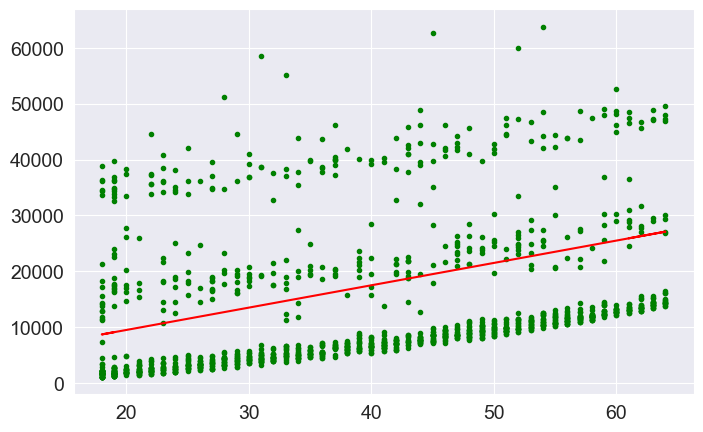

In [35]:
plt.plot(age, estimated_charges, 'r')
plt.scatter(age, actual_charges, color = 'green', s = 9);

In [36]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(prediction - target)))

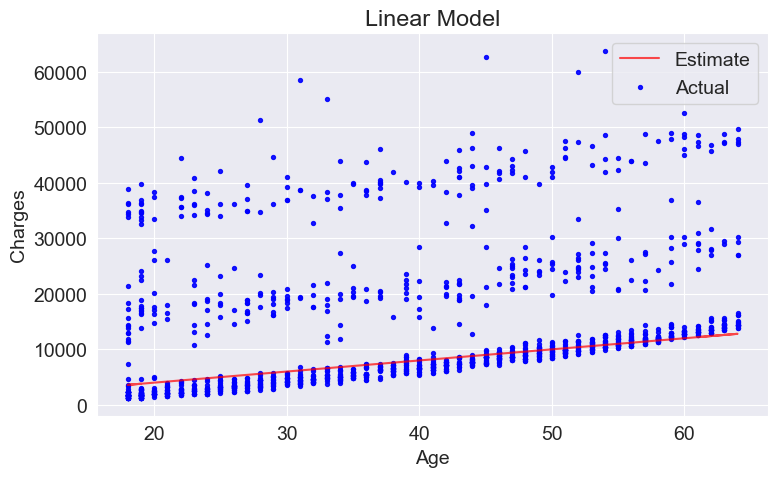

RMSE: 12810.848455635212


In [37]:
def try_parameters(w, b):
    age = df['age']
    target = df['charges']
    estimated_charges = estimate_charge(age, w, b)
    plt.plot(age, estimated_charges, 'r', alpha = 0.7)
    plt.scatter(age, target, color = 'blue', s = 8, alpha = 0.9 )
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Linear Model')
    plt.legend(['Estimate', 'Actual'])
    plt.tight_layout()
    plt.show()
    loss = rmse(target, estimated_charges)
    print(f'RMSE: {loss}')
try_parameters(200, -50)

In [38]:
loss = rmse(actual_charges, estimated_charges)
print(f'RMSE: {loss}')

RMSE: 12358.83240702216


In [39]:
encoder = OneHotEncoder()
encoder.fit(df[['region']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [40]:
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [41]:
one_hot =encoder.transform(df[['region']]).toarray()
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [42]:
numeric_col = ['age', 'bmi', 'children']
scalar = StandardScaler()
scalar.fit(df[numeric_col])

for i, mean in enumerate(scalar.mean_):
    print(f'Computed Mean {i + 1} : {mean}')
for i, var in enumerate(scalar.var_):
    print(f'Computed Variance {i + 1}: {var}')



Computed Mean 1 : 39.20702541106129
Computed Mean 2 : 30.66339686098655
Computed Mean 3 : 1.0949177877429
Computed Variance 1: 197.2538519888909
Computed Variance 2: 37.16008997478835
Computed Variance 3: 1.452126637486287


In [43]:
scaled_inputs = scalar.transform(df[numeric_col])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [44]:
cat_cols = ['smoker_code','sex_code', 'northeast','northwest','southeast','southwest']
categorical_data = df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]], shape=(1338, 6))

In [45]:
inputs, target = np.concatenate([scaled_inputs, categorical_data], axis = 1), df['charges']
model = LinearRegression()
model.fit(inputs, target)
predictions = model.predict(inputs)
predictions
loss = rmse(target, predictions)
print(f'RMSE: {loss}')
loss_2 = root_mean_squared_error(target, predictions)
print(f'RMSE_2: {loss_2}')

RMSE: 6041.679651174452
RMSE_2: 6041.679651174452


In [46]:
intercept = model.intercept_
coefficient = model.coef_


In [47]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_col + cat_cols, 'intercept'),
    'weights': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weights', ascending = False)

,feature,weights
3,smoker_code,23848.534542
9,intercept,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [48]:
numeric_col
cat_cols

['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

In [49]:
new_customer = [[24, 24, 0, 0, 1, 0, 1, 0, 0 ]]
scalar.transform([[24, 24, 0]])

c:\Users\Codex_Jay\Desktop\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.08275831, -1.09309347, -0.90861367]])

In [50]:
model.predict([[-1.08275831, -1.09309347, -0.90861367, 0, 1, 0, 1, 0, 0 ]])

array([1882.37851613])

In [51]:
new_customer2 = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]
scalar.transform([[28, 30, 2]])

c:\Users\Codex_Jay\Desktop\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.79795355, -0.10882659,  0.75107928]])

In [52]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1, 0, 0, 1, 0, 0]])

array([29875.81463371])